In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('heart.csv')
features.head(5)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (303, 14)


In [3]:
# Descriptive statistics for each column
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,150,0,2.3,0,0,1,1
1,0,1,187,0,3.5,0,0,2,1
2,0,0,172,0,1.4,2,0,2,1
3,0,1,178,0,0.8,2,0,2,1
4,0,1,163,1,0.6,2,0,2,1


In [5]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['target'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('target', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (227, 13)
Training Labels Shape: (227,)
Testing Features Shape: (76, 13)
Testing Labels Shape: (76,)


In [8]:
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [9]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


In [10]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

prediction_round=np.around(predictions)
#
# Calculate the absolute errors
errors = abs(prediction_round - test_labels)
#import pdb;pdb.set_trace()
# Print out the mean absolute error (mae)


In [11]:
from sklearn import metrics
#target_names = ['Heart Disease not present', 'Heart Disease present']
#print(metrics.classification_report(prediction_round, test_labels,target_names=target_names))
print(metrics.classification_report(prediction_round, test_labels))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        34
         1.0       0.85      0.83      0.84        42

   micro avg       0.83      0.83      0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



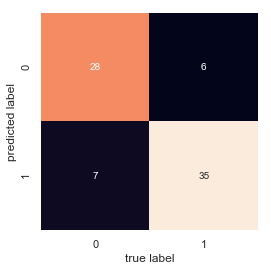

In [12]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_labels, prediction_round)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#import pdb;pdb.set_trace()
plt.xlabel('true label')
plt.ylabel('predicted label');

In [13]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ca                   Importance: 0.21
Variable: cp                   Importance: 0.14
Variable: oldpeak              Importance: 0.11
Variable: thal                 Importance: 0.11
Variable: age                  Importance: 0.08
Variable: trestbps             Importance: 0.07
Variable: thalach              Importance: 0.07
Variable: chol                 Importance: 0.06
Variable: exang                Importance: 0.06
Variable: slope                Importance: 0.04
Variable: sex                  Importance: 0.02
Variable: fbs                  Importance: 0.01
Variable: restecg              Importance: 0.01


In [14]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier(n_estimators=1000,algorithm='SAMME.R',random_state=42,learning_rate=0.01)
adbc.fit(train_features, train_labels)

adb_predictions = adbc.predict(test_features)

adb_errors = abs(prediction_round - test_labels)


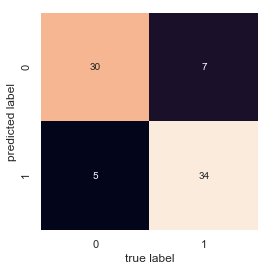

In [15]:
mat = confusion_matrix(test_labels, adb_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#import pdb;pdb.set_trace()
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
print(metrics.classification_report(adb_predictions, test_labels))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.83      0.87      0.85        39

   micro avg       0.84      0.84      0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [17]:
# Add code here to view the important features using the feature_importances_ 
# property in the random forest regression model
 

In [18]:
# Add code here to train again only based on the important features and
# measure the accuracy of the new random forest regression classsifier
# New random forest with only the two most important variables
 